# Khám phá mối quan hệ trong dữ liệu

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from wordcloud import WordCloud
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)

## Đọc dữ liệu từ file csv vào dataframe

In [2]:
data = pd.read_csv("HR_Analytics.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Pie chart

Biểu đồ tròn sử dụng để biểu diễn cơ cấu theo phần trăm. Toàn bộ hình tròn đại diện cho tổng số và mỗi phần nhỏ đại diện cho một mục cụ thể, kích thước của từng mục là tỉ trọng của mục đó trong tổng thể.

Do việc vẽ và nhận xét từng biểu đồ khá tốn thời gian và sẽ làm bài làm rất dài nên mỗi khung trực quan sẽ làm cùng lúc cho 2 trường dữ liệu.

### Hàm để vẽ biểu đồ tròn

In [3]:
def pie_plot(col, title, start):
    temp = data.groupby([col])['Age'].count()
    plt.pie(temp.values, labels = temp.index, colors=sns.color_palette("husl", len(temp.index)), autopct='%1.f%%', startangle = start)
    plt.title(title)

### Cơ cấu lao động chia theo trình độ học vấn và mức độ tham gia công việc
**Trường dữ liệu Education + JobInvolvement**

**Giải thích:**
- Đây là 2 cột dữ liệu dạng categorical nhưng được encode thành dạng numeric.
- 2 cột này đều có từ 3 giá trị trở lên và cũng không có quá nhiều giá trị khác nhau.
- Ở đây muốn xem cơ cấu lao động của từng phân loại nên ta sẽ dùng biểu đồ tròn.

Text(0.5, 0.73, 'Biểu đồ cơ cấu lao động')

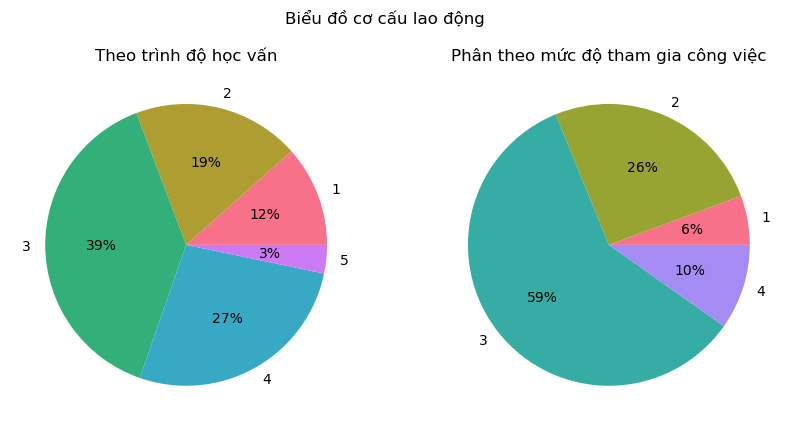

In [4]:
plt.figure(figsize = (10, 10))

plt.subplot(1,2,1)
pie_plot('Education', 'Theo trình độ học vấn', 0)

plt.subplot(1, 2, 2)
pie_plot('JobInvolvement', 'Phân theo mức độ tham gia công việc', 0)

plt.suptitle('Biểu đồ cơ cấu lao động', y = 0.73)

**Nhận xét:**
- Ta có thể thấy đa số nhân viên đều có trình độ học vấn từ tầm trung trở lên, nhưng nhân viên trình độ cao chiếm tỉ trọng rất nhỏ (chỉ 3%). Ngoài ra các nhân viên có trình độ thấp chiếm tỉ trọng nhỏ (31%) điều này có thể cho thấy hiệu quả của việc phổ cập kiến thức, đa số ai cũng phải có trình độ đồng thời cũng cho thấy mức độ đào thải của công ty đối với nhóm công nhân này.
- Đa số nhân viên đều có mức độ đóng góp như nhau (59%), mức thấp nhất chỉ chiếm có 6%.

### Cơ cấu lao động chia theo mức độ hài lòng với công việc và hiệu suất của nhân viên
**Trường dữ liệu JobSatisfaction + PerformanceRating**

**Giải thích:**
- Đây là 2 cột dữ liệu dạng categorical nhưng được encode thành dạng numeric.
- Ở đây muốn xem cơ cấu lao động của từng phân loại nên ta sẽ dùng biểu đồ tròn.

Text(0.5, 0.73, 'Biểu đồ cơ cấu lao động')

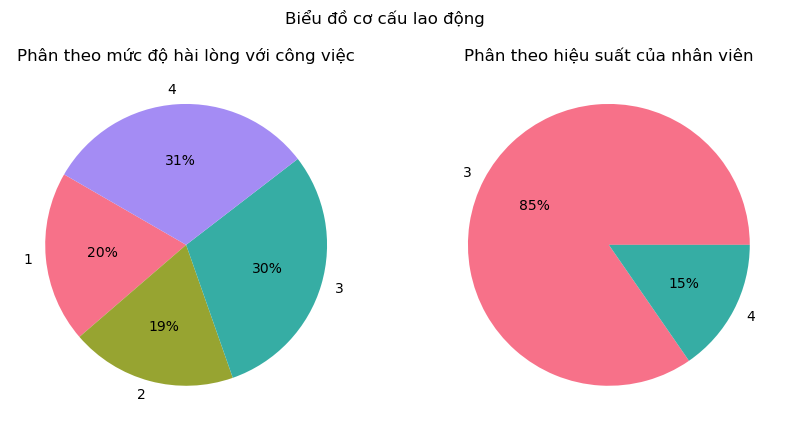

In [5]:
plt.figure(figsize = (10, 10))

plt.subplot(1, 2, 1)
pie_plot('JobSatisfaction', 'Phân theo mức độ hài lòng với công việc', 150)

plt.subplot(1, 2, 2)
pie_plot('PerformanceRating', 'Phân theo hiệu suất của nhân viên', 0)

plt.suptitle('Biểu đồ cơ cấu lao động', y = 0.73)

**Nhận xét:**
- Mức độ phân chia công việc có sự phân bố khá đồng đều về số lượng ở từng mức, nhưng nhìn chung thì các nhân viên đều rất hài lòng với công việc của mình, tỉ lệ hài lòng ở mức 3 và 4 chiếm 61% hơn phân nửa.
- Hiệu suất của nhân viên chỉ có 2 giá trị là 3 và 4 vì thế ta tạm hiểu mức 3 là thấp, 4 là cao. Hầu hết nhân viên có năng suất thấp (85%) gấp gần 6 lần so với nhân viên có năng suất cao.

### Cơ cấu lao động chia theo phòng ban và lĩnh vực đào tạo của nhân viên
**Trường dữ liệu Department + EducationField**

**Giải thích:**
- Đây là 2 cột dữ liệu dạng categorical có 3 giá trị khác nhau trở lên, không có quá nhiều giá trị khác nhau.
- Ở đây muốn xem cơ cấu lao động của từng phân loại nên ta sẽ dùng biểu đồ tròn.

Text(0.5, 0.73, 'Biểu đồ cơ cấu lao động')

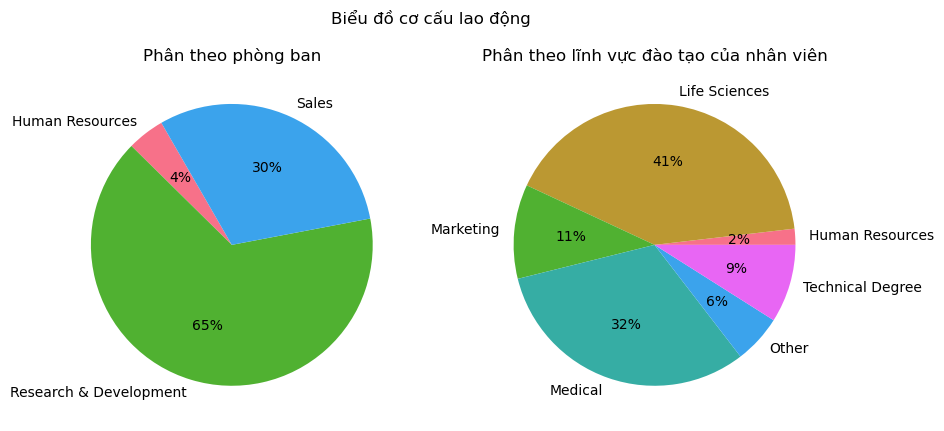

In [6]:
plt.figure(figsize = (10, 10))

plt.subplot(1, 2, 1)
pie_plot('Department', 'Phân theo phòng ban', 120)

plt.subplot(1, 2, 2)
pie_plot('EducationField', 'Phân theo lĩnh vực đào tạo của nhân viên', 0)

plt.suptitle('Biểu đồ cơ cấu lao động', y = 0.73)

**Nhận xét:**
- Công ty có hơn một nửa số lượng nhân viên trong mảng nghiên cứu và lập trình, bộ phận sales chưa đến một nửa của bộ phận nghiên cứu. Nhóm về tài nguyên con người chiếm tỉ lệ thấp nhất là 4%, nhóm này thuộc về mảng quản lý và các hoạt động liên quan đến nhân sự (bao gồm tuyển dụng, đào tạo, phát triển và quản lý nhân viên) nên việc số lượng ít là điều cũng dễ hiểu do đâu thể nào quản lý lại nhiều hơn nhân viên.
- Lĩnh vực về Life Sciences và Medical chiếm 3/4 (73%) trên tổng số nhân viên của công ty. Thấp nhất là mảng tài nguyên con người và Other (các nhóm khác). Marketing và Technical cũng chiếm tỉ trọng nhỏ chỉ 1/5 trên toàn công ty.

### Cơ cấu lao động chia theo tình trạng hôn nhân và tần suất công tác của nhân viên
**Trường dữ liệu MaritalStatus + BusinessTravel**

**Giải thích:**
- Đây là 2 cột dữ liệu dạng categorical có 3 giá trị khác nhau trở lên.
- Ở đây muốn xem cơ cấu lao động của từng phân loại nên ta sẽ dùng biểu đồ tròn.

Text(0.5, 0.73, 'Biểu đồ cơ cấu lao động')

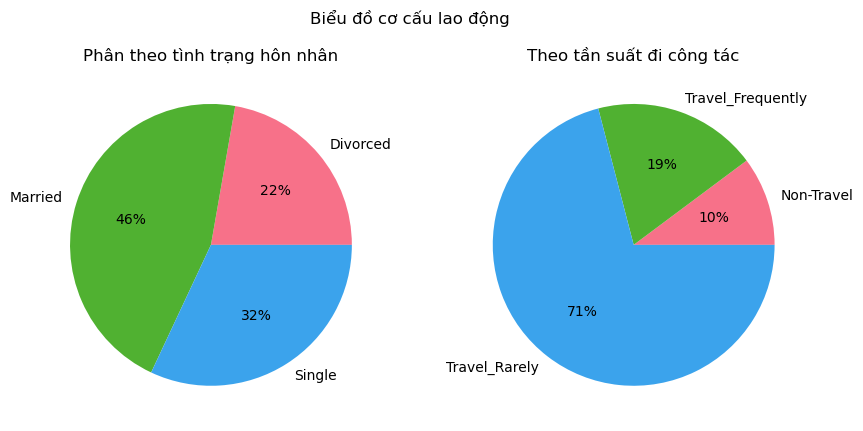

In [7]:
plt.figure(figsize = (10, 10))

plt.subplot(1, 2, 1)
pie_plot('MaritalStatus', 'Phân theo tình trạng hôn nhân', 0)

plt.subplot(1,2,2)
pie_plot('BusinessTravel', 'Theo tần suất đi công tác', 0)

plt.suptitle('Biểu đồ cơ cấu lao động', y = 0.73)

**Nhận xét:**
- Khác với nhiều người nghĩ, trong một công ty luôn có rất nhiều người đã lập gia đình thì trong biểu đồ này ta có thể thấy có tận 1/3 nhân viên chưa từng kết hôn, điều này có thể có nhiều nguyên do như: nhân lực trẻ, kết hôn muộn hoặc thời hiện nay áp lực lập gia đình đã giảm bớt, mọi người có thể tự lựa chọn lối sống cho riêng mình và nhiều người lựa chọn sống độc thân. Ngoài ra thì tỉ lệ người đã ly dị cũng rất cao chiếm 1/5 trên tổng số nhân công trong công ty và nếu 3 người kết hôn thì sẽ có 1 người ly dị, đây là một tỉ lệ rất lớn. Điều này có thể là do hiện nay, suy nghĩ về việc ly hôn của mọi người đã thoáng hơn, không còn bị chì chiết, chỉ trích hậu ly hôn, phụ nữ cũng có công ăn việc làm ổn định không bị phụ thuộc vào kinh tế nên người ta cũng không cần quá cố để sống chung trong mệt mỏi mà chủ động kết thúc trong êm đẹp trước khi mọi chuyện phát triển theo hướng tiêu cực hơn.
- Về tỉ lệ đi công tác, đa số có tần suất thấp và một số ít (10%) không cần phải đi công tác. Như vậy xem ra công ty này rất có khả năng là công ty quốc tế, do tỉ lệ nhân viên đi công tác rất cao (tận 90%), là một con số rất cao so với mặt bằng chung.

### Trường dữ liệu Department, MonthlyRate 

- Ý nghĩa biểu đồ: Phân bố tiền lương của công ty cho mỗi phòng ban
- Lý do chọn biểu đồ: Biểu đồ tròn giúp chúng ta có cái nhìn tổng quan về tỷ lệ của tiền lương cho các phòng ban. Với dạng dữ liệu này có thể sử dụng biểu đồ cột hoặc Treemap. Tuy nhiên thì nhìn vào treemap ta khó so sánh diện tích giữa các thành phần so với nhìn vào tỉ lệ của pie chart. Còn biểu đồ cột thì không thể hiện được tỉ lệ.

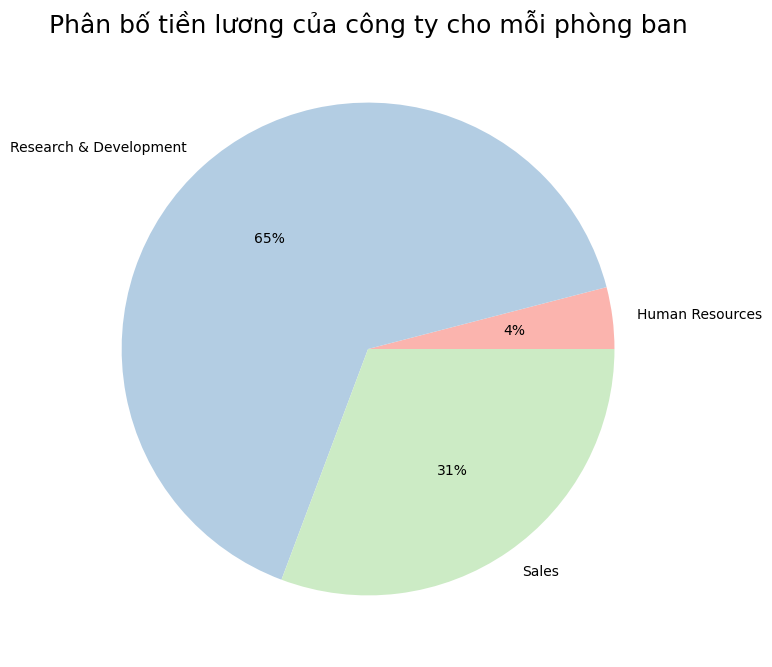

In [8]:
fig, ax = plt.subplots(figsize = (14, 8))
df = data.groupby("Department")["MonthlyRate"].agg(money="sum").reset_index()
plt.pie(df["money"], labels=df['Department'], colors=sns.color_palette("Pastel1"), autopct='%.0f%%')
plt.title("Phân bố tiền lương của công ty cho mỗi phòng ban", fontsize = 18);
# Pastel1 PiYG RdBu_r tab20b_r cubehelix_r

**Nhận xét:**
  - Biểu đồ thể hiện lượng tiền chi trả cho mỗi phòng ban, cho thấy phần lớn lượng tiền được phân bổ vào phòng `Research & Development`, phần còn lại chủ yếu dành cho `Sales` và một phần nhỏ dành cho `Human Resources`. 
  - Ta có thể thấy việc đầu tư cho nghiên cứu và phát triển sản phẩm rất lớn, có thể đây là yếu tố then chốt khi mà tính cạnh tranh ngày càng cao. Nếu tạo ra sản phẩm tốt, độc đáo thì rất dễ để phát triển dài hạn so với việc tập trung đầu tư cho bán hàng và nhân sự.

## Bar chart

Biểu đồ cột dùng để thống kê số lượng hoặc so sánh độ lớn giữa các cá thể khác nhau.

### Thống kê về số lượng nhân viên theo vai trò trong tổ chức để xem nhu cầu nhân lực về vai trò nào là nhiều nhất?
**Trường dữ liệu JobRole**

**Giải thích:**
- Ở đây dùng biểu đồ cột để thống kê về số lượng nhân viên dựa theo vai trò trong tổ chức. Ở đây dùng biểu đồ cột để so sánh độ lớn giữa số lượng nhân viên giữa các phòng ban. 
- Nhìn rõ ràng hơn về thứ tự xếp hạng nhưng bù lại thì chỉ ước lượng được tỉ lệ chênh lệch giữa các vai trò.

Text(0.5, 1.0, 'Số lượng nhân viên chia theo vai trò trong tổ chức')

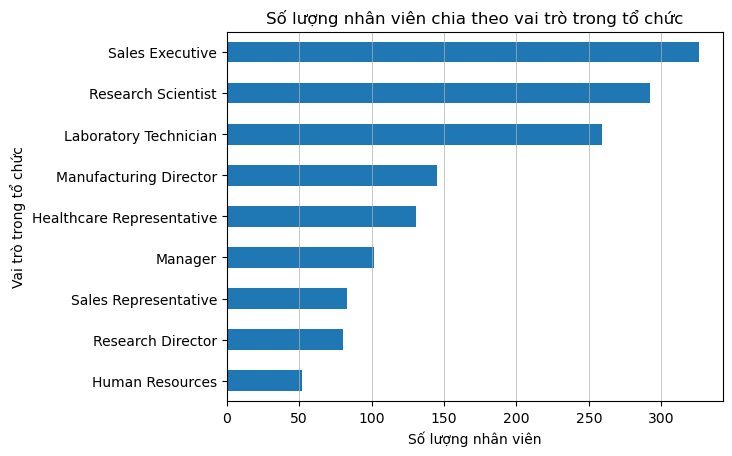

In [9]:
temp = data.groupby(['JobRole'])['Age'].count()
temp = temp.sort_values()
temp.plot(kind = 'barh')
plt.grid(axis = 'x', linewidth = 0.5)
plt.xlabel('Số lượng nhân viên')
plt.ylabel('Vai trò trong tổ chức')
plt.title("Số lượng nhân viên chia theo vai trò trong tổ chức")

**Nhận xét:** Ở đây số lượng nhân viên được chia làm 3 tầng
- Các vai trò có nhiều nhân viên nhất: **Sales Executive, Research Scientist, Laboratory Tachnican** có sự cách biệt lớn về số lượng nhân viên so với những vai trò khác. Điểm chung của chúng là đều là nhân viên trực tiếp tham gia nghiên cứu và phát triển sản phẩm vì thế mà cần một số lượng lớn.
- Các vai trò có ít nhân viên nhât: **Sales Representative, Research Director, Human Resources"** điểm chung của chúng là đều là nhóm quản lý và đưa ra chiến lược. Cũng khá dễ hiểu khi nhóm này có số lượng ít ỏi do số lượng quản lý chắc chẳn phải thấp hơn số lượng nhân viên.
- Nhóm còn lại: **Laboratory Technican, Manufacturing Director, Healthcare Representation** đây là nhóm về y tế và quản lý.

### Trường dữ liệu PerformanceRating, PercentSalaryHike

**Biểu đồ Tỉ lệ tăng lương theo hiệu suất nhân viên.**

Ý nghĩa: Thể hiện tỉ lệ tăng lương theo hiệu suất nhân viên, qua đó so sánh tỉ lệ tăng lương giữa các hiệu suất làm việc.

Lý do chọn biểu đồ: Biểu đồ cột dễ so sánh, với mỗi cột sẽ thể hiện tỉ lệ tăng lương của một giá trị hiệu suất làm việc.

Do mối người đều có tỉ lệ tăng lương khác nhau nên chúng ta sẽ tính tỉ lệ tăng lương trung bình với mỗi hiệu suất làm viêc.

In [10]:
x = data.groupby('PerformanceRating')['PercentSalaryHike'].mean()
x

PerformanceRating
3    14.003215
4    21.849558
Name: PercentSalaryHike, dtype: float64

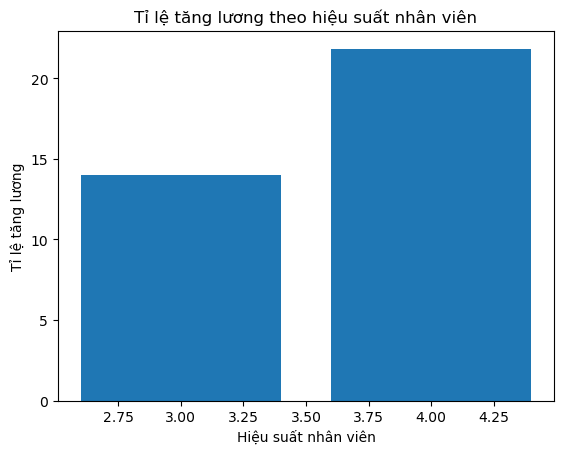

In [11]:
# creating the bar plot
plt.bar(x.index, x.values)
 
plt.xlabel("Hiệu suất nhân viên")
plt.ylabel("Tỉ lệ tăng lương")
plt.title("Tỉ lệ tăng lương theo hiệu suất nhân viên")
plt.show()

**Nhận xét:**
- Hiệu suất làm việc cao hơn thì tỉ lệ tăng lương cao hơn rất nhiều.

### Trường dữ liệu Department, Attrition

**Phòng ban có ảnh hưởng đến khả năng nghỉ việc của nhân viên hay không?**
* Ý nghĩa biểu đồ: Tỉ lệ nhân viên có khả năng nghỉ việc theo các phòng ban
* Lý do chọn biểu đồ: Biểu đồ cột cho thấy được sự chênh lệch của tỉ lệ nhân viên có khả năng nghỉ việc giữa các phòng ban

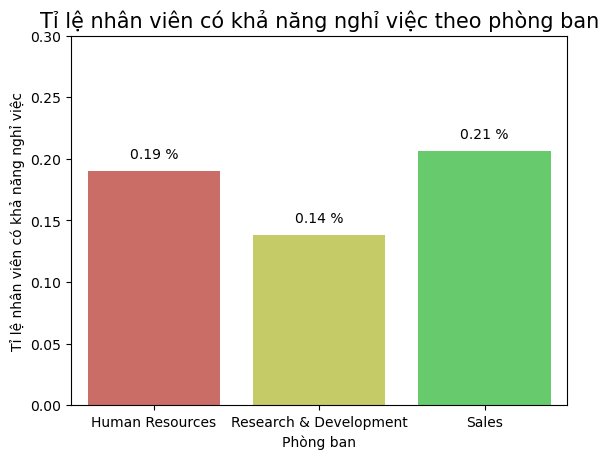

In [12]:
dep_att = data.groupby(['Department', 'Attrition'])['Attrition'].count().unstack()

dep_att['Attrition Rate'] = dep_att['Yes'] / (dep_att['Yes'] + dep_att['No'])

sns.barplot(x=dep_att.index, y=dep_att['Attrition Rate'], palette=sns.color_palette("hls"))
plt.title('Tỉ lệ nhân viên có khả năng nghỉ việc theo phòng ban', fontsize=15)
plt.xlabel('Phòng ban', fontsize=10)
plt.ylabel('Tỉ lệ nhân viên có khả năng nghỉ việc', fontsize=10)
plt.ylim((0, 0.3))
for i, rate in enumerate(dep_att['Attrition Rate']):
    plt.text(i, rate+0.01, f'{rate:.2f} %', ha='center')
plt.show()

**Nhận xét:**
  * Ở phòng tỉ lệ nhân viên có khả năng nghỉ việc ở phòng ***Sales*** là nhiều nhất, còn ở phòng ***Research & Development*** là ít nhất. Tuy nhiên tỉ lệ nhân viên có khả năng nghỉ việc ở 3 phòng ban không có sự chênh lệch quá nhiều.
  * Do đó có thể thấy tỉ lệ nhân viên có khả năng nghỉ việc không ảnh hưởng bởi phòng ban.

### Trường dữ liệu OverTime, Attrition

**Overtime có ảnh hưởng đến khả năng nghỉ việc của nhân viên hay không?**
* Ý nghĩa biểu đồ: Tỉ lệ nhân viên có khả năng nghỉ việc đối với việc nhân viên có overtime hay không
* Lý do chọn biểu đồ: Biểu đồ cột cho thấy được sự chênh lệch của tỉ lệ nhân viên có khả năng nghỉ việc giữa việc có overtime hay không

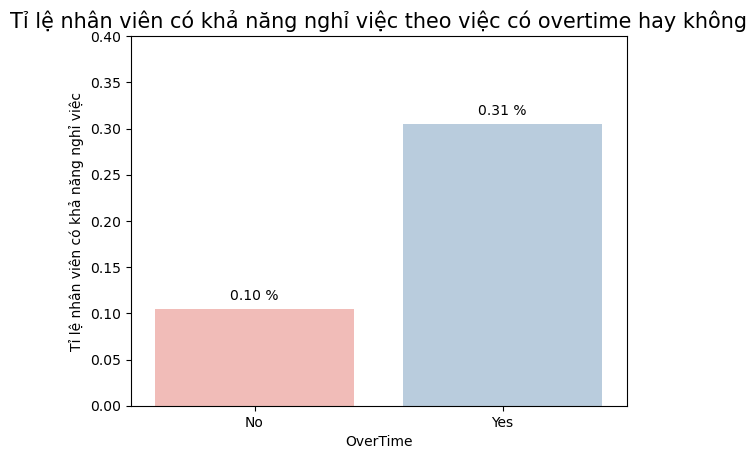

In [13]:
ovt_att = data.groupby(['OverTime', 'Attrition'])['Attrition'].count().unstack()

ovt_att['Attrition Rate'] = ovt_att['Yes'] / (ovt_att['Yes'] + ovt_att['No'])

sns.barplot(x=ovt_att.index, y=ovt_att['Attrition Rate'], palette=sns.color_palette("Pastel1"))
plt.title('Tỉ lệ nhân viên có khả năng nghỉ việc theo việc có overtime hay không', fontsize=15)
plt.xlabel('OverTime', fontsize=10)
plt.ylabel('Tỉ lệ nhân viên có khả năng nghỉ việc', fontsize=10)
plt.ylim((0, 0.4))
for i, rate in enumerate(ovt_att['Attrition Rate']):
    plt.text(i, rate+0.01, f'{rate:.2f} %', ha='center')
plt.show()

**Nhận xét:**
  * Tỉ lệ có khả năng nghỉ việc ở những nhân viên có overtime cao gấp gần 3 lần so với những nhân viên không overtime. Điều này có thể lý giải khi làm thêm ngoài giờ thì họ sẽ cảm thấy mệt mỏi, chán nản với công ty mình đang làm và khó cân bằng công việc, cuộc sống và các mối quan hệ hơn, họ có thể tìm kiếm cơ hội tốt hơn ở môi trường khác nên khả năng nghỉ việc cao.
  * Ta có thể kết luận overtime ảnh hưởng khá lớn đến khả năng nghỉ việc của nhân viên.

### Trường dữ liệu JobLevel, Attrition

**Cấp độ công việc có ảnh hưởng đến khả năng nghỉ việc của nhân viên hay không?**
* Ý nghĩa biểu đồ: Tỉ lệ nhân viên có khả năng nghỉ việc theo cấp độ công việc 
* Lý do chọn biểu đồ: Biểu đồ cột cho thấy được sự chênh lệch của tỉ lệ nhân viên có khả năng nghỉ việc giữa các cấp độ công việc khác nhau

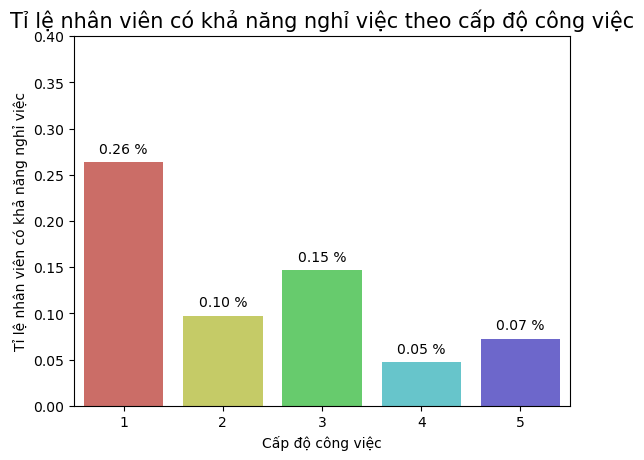

In [14]:
joblvl_att = data.groupby(['JobLevel', 'Attrition'])['Attrition'].count().unstack()

joblvl_att['Attrition Rate'] = joblvl_att['Yes'] / (joblvl_att['Yes'] + joblvl_att['No'])

sns.barplot(x=joblvl_att.index, y=joblvl_att['Attrition Rate'], palette=sns.color_palette("hls"))
plt.title('Tỉ lệ nhân viên có khả năng nghỉ việc theo cấp độ công việc', fontsize=15)
plt.xlabel('Cấp độ công việc', fontsize=10)
plt.ylabel('Tỉ lệ nhân viên có khả năng nghỉ việc', fontsize=10)
plt.ylim((0, 0.4))
for i, rate in enumerate(joblvl_att['Attrition Rate']):
    plt.text(i, rate+0.01, f'{rate:.2f} %', ha='center')
plt.show()

**Nhận xét:**
  * Ở cấp độ công việc 1, tỉ lệ nhân viên có khả năng nghỉ việc cao nhất, chênh lệch nhiều so với các cấp độ còn lại.
  * ở cấp độ công việc 4 5, tỉ lệ nhân viêc có khả năng nghỉ việc rất thấp.
  * Ở những nhân viên mới, ở cấp độ thấp hơn, thường ít có xu hướng gắn bó với công ty mình đang làm, họ thường chuyển công ty để tìm được môi trường mới phù hợp hơn, tìm nhiều kinh nghiệm trong công việc hơn, tìm được mức lương phù hợp hơn,.... Ngược lại ở những nhân viên cấp độ cao hơn, thì họ lại gắn bó với công ty hơn, do mong muốn ổn định trong công việc của họ,...
  * Cấp độ công việc của nhân viên có ảnh hưởng đến khả năng nghỉ việc của họ.

### Trường dữ liệu Gender, EducationField, Attrition

**So sánh số lượng nhân viên nghỉ việc giữa các chuyên ngành theo giới tính**
* Ý nghĩa biểu đồ: Số lượng nhân viên có khả năng nghỉ việc theo giới tính và chuyên ngành
* Lý do chọn biểu đồ: Biểu đồ cột cho thấy được sự chênh lệch của số lượng nhân viên có khả năng nghỉ việc giữa các chuyên ngành và giới tính

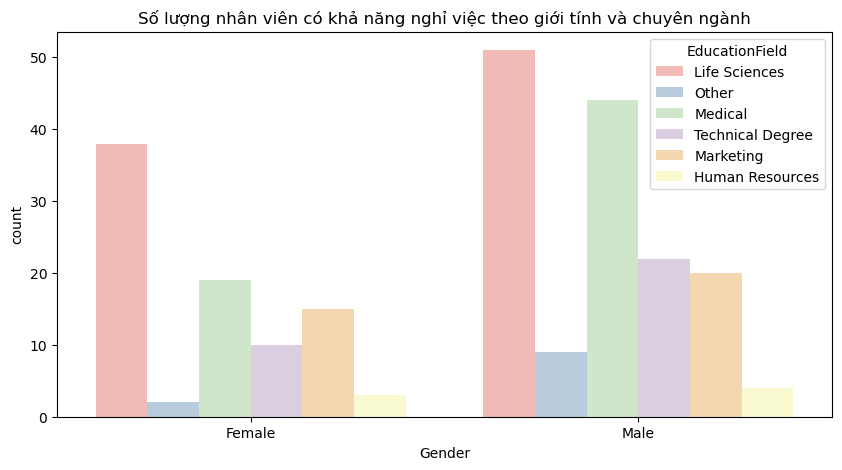

In [15]:
plt.figure(figsize = (10,5))

df_attrition = data.loc[data['Attrition'] == 'Yes']

plt.title("Số lượng nhân viên có khả năng nghỉ việc theo giới tính và chuyên ngành")
sns.countplot(x = 'Gender', hue = 'EducationField', data = df_attrition, palette=sns.color_palette("Pastel1"))
plt.show()

**Nhận xét:**
  * Số lượng nhân viêc có khả năng nghỉ việc ở nam nhiều hơn so với nữ.
  * Ngành ***Technical Degrees*** là ngành mà số lượng nữ ít hơn nhiều so với nam nên có sự khác nhau về số lượng nhân viên có khả năng nghỉ việc ở nam và nữ ở ngành này ở biểu đồ trên.
  * Ở nam và nữ đều có sự tương đồng khi số lượng nghỉ việc ở các ngành ***Life Sciences*** và ***Medical*** chiếm nhiều nhất so với các ngành còn lại.
  * Có thể thấy ngành ***Life Sciences*** và ***Medical*** có thể có những yếu tố như: Môi trường làm việc, áp lực, overtime,... khiến cho các nhân viên ở cả nam và nữ đều có khả năng nghỉ việc nhiều nhất.

## Grouped bar chart

Biểu đồ cột ghép dùng để so sánh hay thống kê về kích thước / số lượng theo 2 phân loại khác nhau.

### Có sự khác biệt nào về tỉ lệ làm thêm giờ của nam và nữ nếu chia theo tình trạng hôn nhân hay không? Tình trạng hôn nhân có ảnh hưởng như thế nào đến tỉ lệ làm thêm giờ ở hai giới này?
**Trường dữ liệu MaritalStatus, OverTime và Gender**

**Giải thích:**
- Với 3 biến đã chọn thì cần một loại biểu đồ có thể biểu diễn được 3 chiều dữ liệu, trong số đó có một chiều là tỉ lệ có độ lớn có thể dùng bar chart nên sẽ dùng biểu đồ cột ghép.
- Biểu đồ thể hiện độ lớn của tỉ lệ theo 2 biến phân loại là tình trạng hôn nhân và giới tính.

Đầu tiên ta cần thống kê tỉ lệ phần trăm làm thêm giờ của nam và nữ dựa trên tình hình hôn nhân và kết quả sẽ được lưu ở cột **percent**

In [16]:
temp1 = data.groupby(['MaritalStatus', 'OverTime', 'Gender'])['Age'].count().reset_index()
temp1 = temp1[temp1['OverTime'] == 'Yes'].reset_index(drop = True)
temp = data.groupby(['MaritalStatus', 'Gender'])['Age'].count().reset_index()
temp['percent'] = temp1['Age'] / temp['Age'] * 100
temp

,MaritalStatus,Gender,Age,percent
0,Divorced,Female,117,36.752137
1,Divorced,Male,210,26.666667
2,Married,Female,272,27.205882
3,Married,Male,401,27.930175
4,Single,Female,199,31.658291
5,Single,Male,271,25.092251


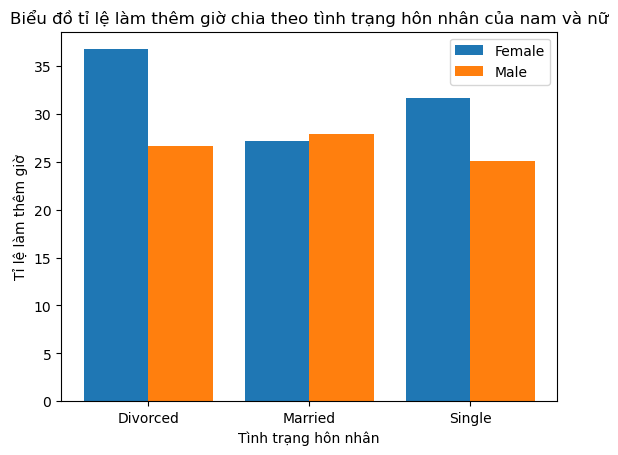

In [17]:
plt.bar(np.arange(3) - 0.2, temp[temp['Gender'] == 'Female']['percent'], 0.4, label = 'Female')
plt.bar(np.arange(3) + 0.2, temp[temp['Gender'] == 'Male']['percent'], 0.4, label = 'Male')
plt.xticks(np.arange(3), temp['MaritalStatus'].unique())
plt.legend()
plt.title("Biểu đồ tỉ lệ làm thêm giờ chia theo tình trạng hôn nhân của nam và nữ")
plt.xlabel('Tình trạng hôn nhân')
plt.ylabel('Tỉ lệ làm thêm giờ')
plt.show()

**Nhận xét:**
- Ta có thể thấy tỉ lệ nữ làm thêm giờ cao hẳn hơn nam trong trường hợp độc thân hoặc đã ly hôn, trong trường hợp kết hôn tỉ lệ nữ làm thêm giờ sụt hẳn và ngược lại với nam do nam đạt tỉ lệ cao nhất ở cột kết hôn.
- Sự khác biệt trên có thể được giải thích là khi nữ đã kết hôn thì sẽ phải dành nhiều thời gian cho gia đình, nội trợ và con cái còn đàn ông thì phải phụ trách về kinh tế trong gia đình nên có sự thay đổi lớn trong nhóm trong tình trạng kết hôn.
- Nhưng khi ly hôn, tỉ lệ làm thêm của nữ lại tăng vọt, điều này có thể là do ngoài thiếu đi sự hỗ trợ kinh tế từ chồng, phụ nữ còn phải kiếm thêm tiền so với lúc độc thân để chăm sóc cho con cái. Dù nam vẫn có nhưng một phần là do trong quá trình trong mối quan hệ hôn nhân, người nam vẫn tập trung toàn lực về công việc nên sẽ thuận lợi hơn trong con đường thăng tiến nên không làm thêm giờ là do mức lương của nam tăng trưởng nhanh.

## Word cloud

Biểu đồ Word Cloud biểu diễn tần suất xuất hiện của từng cá thể trong tổng thể bằng kích thước của cá thể đó trong đám mây từ và cũng nhờ thế mà nó nhấn mạnh hơn về các phần tử có tần suất xuất hiện cao. 
Radar chart cũng khá giống với pie chart hoặc bar chart nhìn vào sẽ biết được cái nào xuất hiện nhiều, cái nào ít. Tuy nhiên không thể ước lượng về tỉ lệ khác nhau (cái này gấp bao nhiêu lần cái kia) giữa các phần tử.

Sau khi đã trực quan, nhóm nhận thấy dùng word cloud sẽ chỉ tốt cho trường hợp nhấn mạnh về tần suất xuất hiện vượt trội của một cá thể nào đó, tăng thêm tính thẩm mỹ và thu hút người nhìn, còn để so sánh được lớn hơn bao nhiêu hoặc biết chính xác chiếm bao nhiêu thì dùng biểu đồ tròn sẽ tốt hơn.

### Những phòng ban nào có nhiều hoặc ít nhân viên nhất
**Trường dữ liệu JobRole**

**Giải thích:**
- Muốn dùng biểu đồ word cloud để nhấn mạnh, tìm ra top những phòng ban có số lượng nhân viên cao nhất và thấp nhất, không quan tâm đến thứ hạng chính xác.

Text(0.5, 1.05, 'Các phòng ban có nhiều nhân viên')

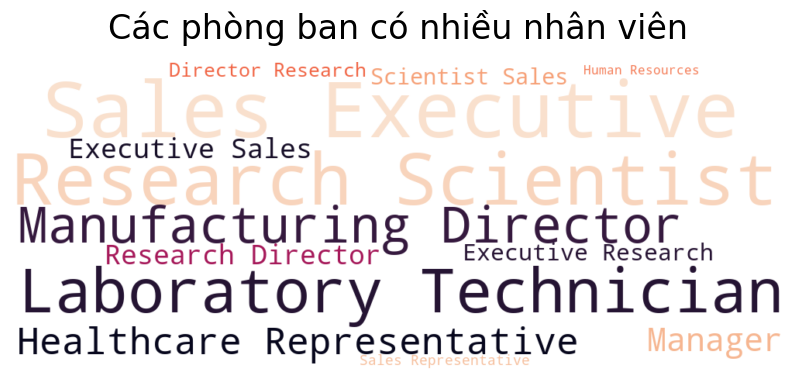

In [18]:
data['Job_Role'] = data['JobRole'].str.replace(' ', '-')
text = " ".join(i for i in data[data['Attrition'] == 'No']['Job_Role'].values)
wordcloud=WordCloud(width=1000,height=400,margin=1,background_color='white', colormap='rocket').generate(text)
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Các phòng ban có nhiều nhân viên", size = 24, y = 1.05)

**Nhận xét:**
- Nhìn vào kích thước chữ trên bảng Word Count ta có thể thấy Sales Executive và Research Scientist có số lượng nhân viên đông nhất. Human Resources có số lượng thấp nhất.

### Nhân viên ở những lĩnh vực nào là nhiều nhất hoặc ít nhất
**Trường dữ liệu EducationField**

**Giải thích:**
- Muốn dùng biểu đồ word cloud để nhấn mạnh, tìm ra top những lĩnh vực đào tạo có số lượng nhân viên cao nhất và thấp nhất, không quan tâm đến thứ hạng chính xác.

Text(0.5, 1.05, 'Các lĩnh vực có nhiều nhân viên')

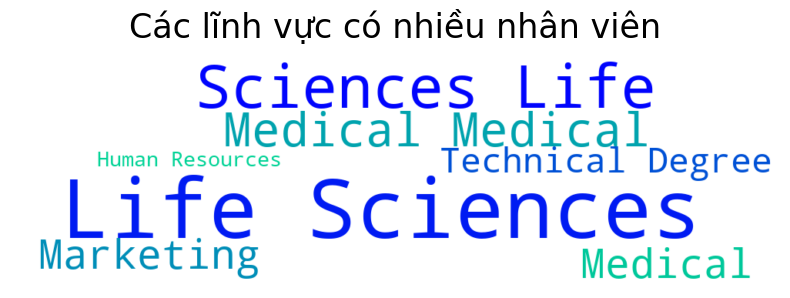

In [19]:
data['Education_Field'] = data['EducationField'].str.replace(' ', '-')
text = " ".join(i for i in data[data['Attrition'] == 'No']['Education_Field'].values)
wordcloud=WordCloud(width=1000,height=300,margin=1,background_color='white', colormap = 'winter').generate(text)
plt.figure(figsize = (10, 3))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Các lĩnh vực có nhiều nhân viên", size = 24, y = 1.05)

**Nhận xét:**
- Nhìn vào kích thước chữ trên bảng Word Count ta có thể thấy Life Sciences có số lượng nhân viên đông nhất. Human Resources có số lượng thấp nhất.

## Radar chart

Radar chart dùng để so sánh cùng lúc nhiều tính chất của 2 hoặc nhiều cá thể / nhóm phân loại khác nhau. Nhìn vào biểu đồ ta có thể dễ dàng thấy được nhóm hoặc cá thể nào có điểm mạnh, điểm yếu là gì và đồng thời cũng thấy được tỉ lệ chênh lệch giữa các nhóm với nhau.

### Trung bình một số chỉ số của nhân viên có mức lương cao và thấp thì có sự khác biệt thế nào? Mức lương có liên quan đến kinh nghiệm và thời gian gắn bó hay không?
**Trường dữ liệu Education, NumCompaniesWorked, JobLevel, YearsInCurrentRole, YearsAtCompany và MonthlyIncome**

Để vẽ sơ đồ so sánh chỉ số trung bình của nhân viên có mức lương cao và thấp thì ta cần định nghĩa thế nào là cao, thế nào là thấp?

Ở đây nhóm lựa chọn mức thấp là __MonthlyIncome <= 3000 và MonthlyIncome >= 15000__ cho mức cao.

Do độ lớn của cột năm chêch lệch lớn với các cột khác nên ta sẽ chia 3 để giữ nguyên tỉ lệ chênh lệch giữa nhóm cao và thấp đồng thời cũng dễ quan sát trên biểu đồ hơn.

In [20]:
status = ['Education', 'NumCompaniesWorked', 'JobLevel', 'YearsInCurrentRole', 'YearsAtCompany']
angles = np.linspace(0,2 * np.pi, len(status), endpoint = False)
angles = np.concatenate((angles, [angles[0]]))
status.append(status[0])

In [21]:
low_salary = data[data['MonthlyIncome'] <= 3000]
low_salary = low_salary[status].mean().values
low_salary[3:5] = low_salary[3:5] / 3

In [22]:
high_salary = data[data['MonthlyIncome'] >= 15000]
high_salary = high_salary[status].mean().values
high_salary[3:5] = high_salary[3:5] / 3

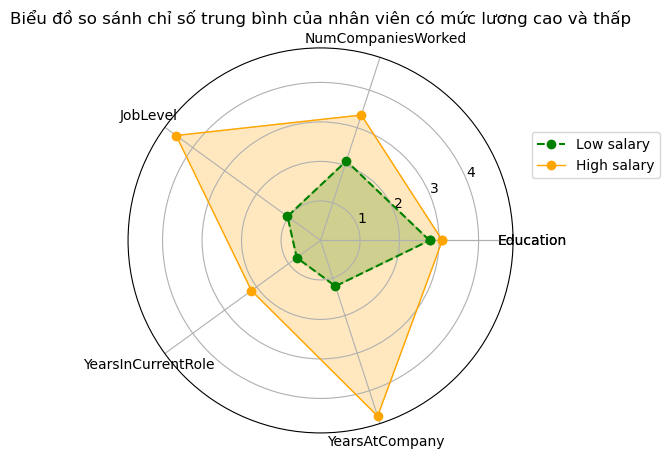

In [23]:
fig=plt.figure(figsize=(5,5))

ax = fig.add_subplot(polar=True)

ax.plot(angles, low_salary, 'o--', color = 'g', label = 'Low salary')
ax.fill(angles, low_salary, alpha = 0.25, color = 'g')

ax.plot(angles, high_salary, 'o-', color = 'orange', linewidth = 1, label='High salary')
ax.fill(angles, high_salary, alpha = 0.25, color='orange')

ax.set_thetagrids(angles * 180 / np.pi, status)

plt.legend(bbox_to_anchor = (1.4, 0.8))
plt.title("Biểu đồ so sánh chỉ số trung bình của nhân viên có mức lương cao và thấp")
plt.show()

**Nhận xét:**
- Chênh lệch lớn nhất là ở thời gian làm việc tại công ty và cấp độ công việc của nhân viên. Như vậy ta có thể thấy rõ việc gắn bó lâu dài với công ty cũng là một điểm cộng đối với mức lương của nhân viên, và thời gian làm việc lâu dài thì nhân viên cũng có nhiều cơ hội thăng tiến, ở cấp độ công việc càng cao thì lương cũng càng cao.
- Tiếp theo ta cũng thấy Số năm nhân viên đảm nhận vị trí hiện tại và Số lượng công ty đã làm việc qua cũng liên quan đến kinh nghiệm của bản thân. Việc nhảy việc cũng là một yếu tố để nhân viên có được mức lương tăng nhanh hơn so với mức tăng trưởng thông thường.
- Ở biểu đồ này ta thấy chênh lệch học vần giữa người có mức lương cao và thấp là không nhiều. Như thế ta có thể kết luận mọi người đều có xuất phát điểm như nhau, sau này còn nhiều yếu tố khác quyết định mức lương của bản thân nên phải luôn cố gắng.

## Logistic Regression

### Vậy thì tỉ lệ nghỉ việc giữa nam và nữ có gì khác nhau không nếu so cùng một độ tuổi
**Trường dữ liệu Gender, Attrition và Age**

Tại đây ta sẽ encode biến Attrition với 1 là Yes nghĩa là đã nghỉ việc, 0 là No nghĩa là vẫn còn làm tại công ty.

Sau đó ta dùng hàm Logit để tìm phương trình hồi quy logistic của hàm.

Cuối cùng là dùng biểu đồ đường để trực quan mối quan hệ giữa tỉ lệ nhân viên nghỉ việc theo độ tuổi.

Optimization terminated successfully.
         Current function value: 0.394148
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.448164
         Iterations 6


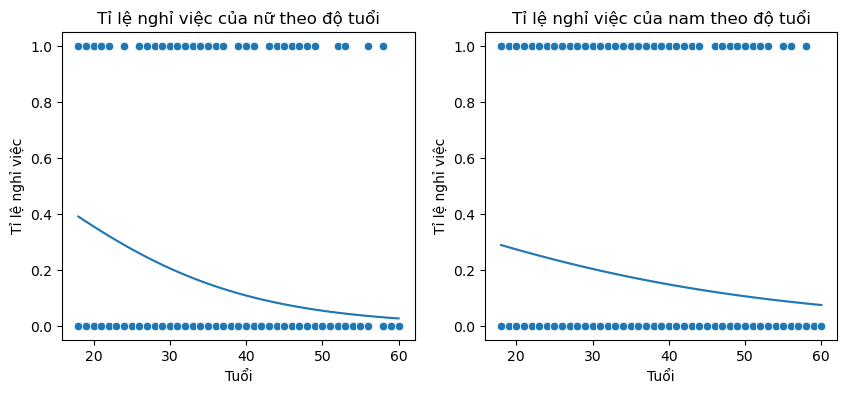

In [24]:
temp = data[data['Gender'] == "Female"]

temp = temp.sort_values(by = ['Age']).reset_index(drop = True)
temp['Attrition'] = temp['Attrition'].replace(['No','Yes'],[0,1]).reset_index(drop = True)
temp['Attrition'] = temp['Attrition'].dropna()
y = temp['Attrition']
X = temp['Age']
X = sm.add_constant(X)
model1 = sm.Logit(y, X).fit()
predictions = model1.predict(X)

plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x = X['Age'], y = predictions)
sns.scatterplot(data = temp, x = 'Age', y = 'Attrition')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ nghỉ việc')
plt.title("Tỉ lệ nghỉ việc của nữ theo độ tuổi")

temp = data[data['Gender'] == "Male"]

temp = temp.sort_values(by = ['Age']).reset_index(drop = True)
temp['Attrition'] = temp['Attrition'].replace(['No','Yes'],[0,1]).reset_index(drop = True)
temp['Attrition'] = temp['Attrition'].dropna()
y = temp['Attrition']
X = temp['Age']
X = sm.add_constant(X)
model2 = sm.Logit(y, X).fit()
predictions = model2.predict(X)

plt.subplot(1, 2, 2)
sns.lineplot(x = X['Age'], y = predictions)
sns.scatterplot(data = temp, x = 'Age', y = 'Attrition')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ nghỉ việc')
plt.title("Tỉ lệ nghỉ việc của nam theo độ tuổi")
plt.show()

In [25]:
print("Phương trình hồi quy cho nữ: log(y * (1 - y)) =", round(model1.params[0], 3), '-', round(-model1.params[1], 3), '* x' )
print("Phương trình hồi quy cho nam: log(y * (1 - y)) =", round(model2.params[0], 3), '-', round(-model2.params[1], 3), '* x' )

Phương trình hồi quy cho nữ: log(y * (1 - y)) = 0.914 - 0.076 * x
Phương trình hồi quy cho nam: log(y * (1 - y)) = -0.208 - 0.039 * x


Nhìn vào biểu đồ phía trên ta có thể rút ra nhận xét như sau:
- Giống nhau: ở độ tuổi càng nhỏ thì tỉ lệ nhảy việc càng cao và càng lớn tuổi thì khả năng gắn bó với công ty càng cao.
- Khác nhau: Khi còn trẻ nữ sẽ nhảy việc nhiều hơn nam nhưng đồng thời cũng sẽ tìm được công ty phù hợp với mình nhanh hơn như hình trên thì độ dốc của biểu đồ bên nữ cao hơn bên nam.

### Thực hiện tương tự cho tỉ lệ làm thêm giờ giữa nam và nữ có gì khác nhau không nếu so cùng một độ tuổi
**Trường dữ liệu Gender, OverTime và Age**

Tại đây ta sẽ encode biến Overtime với 1 là Yes nghĩa là làm thêm giờ, 0 là No nghĩa là không làm thêm giờ.

Sau đó ta dùng hàm Logit để tìm phương trình hồi quy logistic của hàm.

Cuối cùng là dùng biểu đồ đường để trực quan mối quan hệ giữa tỉ lệ nhân viên làm thêm giờ theo độ tuổi.

Optimization terminated successfully.
         Current function value: 0.615736
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579007
         Iterations 5


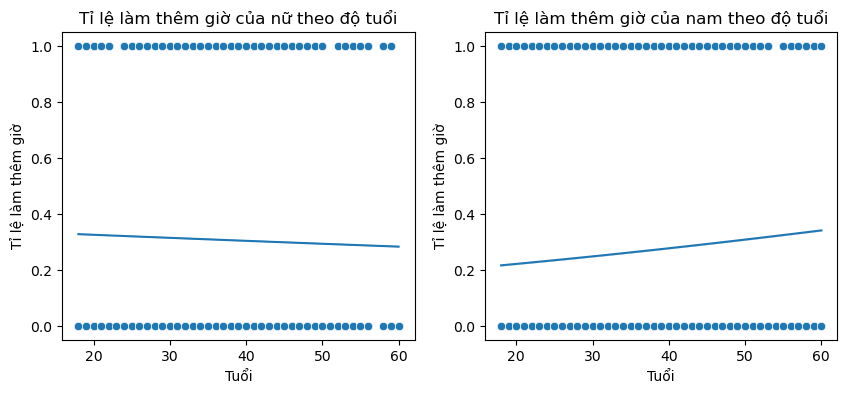

In [26]:
temp = data[data['Gender'] == "Female"]

temp = temp.sort_values(by = ['Age']).reset_index(drop = True)
temp['OverTime'] = temp['OverTime'].replace(['No','Yes'],[0,1]).reset_index(drop = True)
temp['OverTime'] = temp['OverTime'].dropna()
y = temp['OverTime']
X = temp['Age']
X = sm.add_constant(X)
model1 = sm.Logit(y, X).fit()
predictions = model1.predict(X)

plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x = X['Age'], y = predictions)
sns.scatterplot(data = temp, x = 'Age', y = 'OverTime')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ làm thêm giờ')
plt.title("Tỉ lệ làm thêm giờ của nữ theo độ tuổi")

temp = data[data['Gender'] == "Male"]

temp = temp.sort_values(by = ['Age']).reset_index(drop = True)
temp['OverTime'] = temp['OverTime'].replace(['No','Yes'],[0,1]).reset_index(drop = True)
temp['OverTime'] = temp['OverTime'].dropna()
y = temp['OverTime']
X = temp['Age']
X = sm.add_constant(X)
model2 = sm.Logit(y, X).fit()
predictions = model2.predict(X)

plt.subplot(1, 2, 2)
sns.lineplot(x = X['Age'], y = predictions)
sns.scatterplot(data = temp, x = 'Age', y = 'OverTime')
plt.xlabel('Tuổi')
plt.ylabel('Tỉ lệ làm thêm giờ')
plt.title("Tỉ lệ làm thêm giờ của nam theo độ tuổi")
plt.show()

In [27]:
print("Phương trình hồi quy cho nữ: log(y * (1 - y)) = ", round(model1.params[0], 3), '-', round(-model1.params[1], 3), '* x' )
print("Phương trình hồi quy cho nam: log(y * (1 - y)) = ", round(model2.params[0], 3), '-', round(-model2.params[1], 3), '* x' )

Phương trình hồi quy cho nữ: log(y * (1 - y)) =  -0.632 - 0.005 * x
Phương trình hồi quy cho nam: log(y * (1 - y)) =  -1.561 - -0.015 * x


**Nhận xét:**
- Thời gian đầu nữ làm thêm giờ rất nhiều nhưng về sau lại giảm, còn nam thi càng lớn tuổi thì tỉ lệ làm thêm giờ càng cao. Điều này có thể giải thích bằng việc sau khi kết hôn, phụ nữ sẽ phải dành nhiều thời gian hơn cho gia đình, nội trợ và con cái còn đàn ông thì phải phụ trách chính trong kinh tế.

## Heat map

Biểu đồ heat map là một biểu đồ hai chiều được sử dụng để trình bày dữ liệu trong đó màu sắc của mỗi ô được sử dụng để đại diện cho giá trị của dữ liệu đó. Chúng có thể giúp cho người dùng nhìn thấy các mối quan hệ và xu hướng trong dữ liệu một cách nhanh chóng và dễ dàng hơn so với việc sử dụng các biểu đồ khác.

### Biểu đồ sự hài lòng với công việc và sự hài lòng với môi trường làm việc của nhân viên. Có phải ai hài lòng hoặc không hài lòng với công ty cũng sẽ tương tự với công việc hay không?

**Trường dữ liệu JobSatisfaction, EnvironmentSatisfaction**

Ý nghĩa: Vừa cho thấy được sự hài lòng của nhân viên với công việc, vừa cho thấy được sự hài lòng của nhân viên với môi trường làm việc trên cùng biểu đồ. Cảm nhận của nhân viên với môi trường làm việc và công việc của mình làm.

Lý do chọn biểu đồ: 
- Mỗi trường dữ liệu đều có ít giá trị, nên sự lặp lại của các cặp giá trị là nhiều.
- Để thể hiện sự hài lòng với công việc và sự hài lòng với môi trường làm việc trên cùng 1 biểu đồ, ta sẽ đếm từng cặp dữ liệu giữa 2 trường, qua đó biết được dữ liệu thường xuất hiện ở những cặp giá trị nào. Khi đó ta sẽ có 1 ma trận giá trị, lúc này dùng đến heatmap

In [28]:
x = data.groupby('JobSatisfaction')['EnvironmentSatisfaction'].value_counts().sort_index()
x

JobSatisfaction  EnvironmentSatisfaction
1                1                           53
                 2                           55
                 3                           94
                 4                           87
2                1                           47
                 2                           59
                 3                           87
                 4                           87
3                1                          100
                 2                           84
                 3                          128
                 4                          130
4                1                           84
                 2                           89
                 3                          144
                 4                          142
Name: EnvironmentSatisfaction, dtype: int64

In [29]:
y = np.array(x).reshape(4,4)
y

array([[ 53,  55,  94,  87],
       [ 47,  59,  87,  87],
       [100,  84, 128, 130],
       [ 84,  89, 144, 142]])

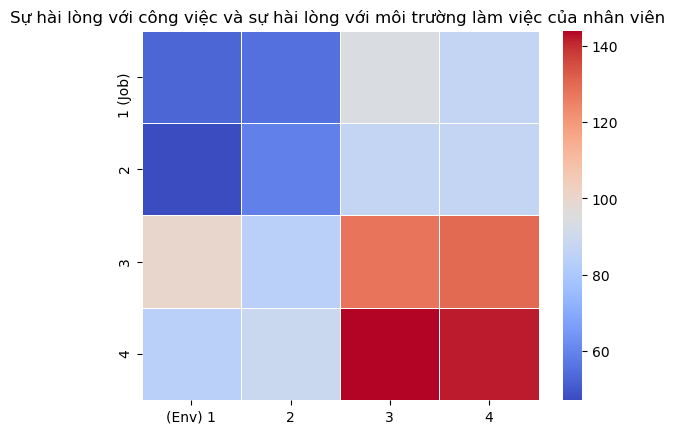

In [30]:
xlabel = ['(Env) 1',2,3,4]
ylabel = ['1 (Job)',2,3,4]

ax = sns.heatmap( y , linewidth = 0.5 , cmap = 'coolwarm', xticklabels=xlabel, yticklabels=ylabel )
  
plt.title( "Sự hài lòng với công việc và sự hài lòng với môi trường làm việc của nhân viên " )
plt.show()

**Nhận xét:**
- Đa số các nhân viên đều vừa hài lòng với công việc của mình, vừa hài lòng với công việc của mình. Trong đó có vẻ như nhiều người hài lòng với môi trường hơn với công việc.
- Số người vừa không hài lòng với công việc, vừa không hài lòng với mối trường làm việc chiếm tỷ lệ ít nhất.
- Số người chỉ hài lòng với công việc mà không hài lòng với môi trường hay ngược lại cũng có không ít.

## Box plot

Biểu đồ box plot thể hiện sự phân bố cuả dữ liệu. Thể hiện qua 5 vị trí đó là: giá trị nhỏ nhất (min), tứ phân vị thứ nhất (Q1), trung vị (median), tứ phân vị thứ 3 (Q3) và giá trị lớn nhất (max).

### Biểu đồ lương hằng tháng theo giới tính. Có sự chênh lệch nào về mức lương liên quan đến giới tính hay không?

**Trường dữ liệu: Gender, MonthlyRate**

Ý nghĩa: có thể so sánh mức lương theo tháng giữa nam và nữ.

Lý do chọn biểu đồ: Với biểu đồ box plot ta có thể thấy được lương hằng tháng của nhân viên phân bố thế nào, kết hợp với trường dữ liệu `Gender` từ đó so sánh mức lương hằng tháng giữa nam và nữ.

In [31]:
male = data[data['Gender'] == 'Male']['MonthlyRate']
female = data[data['Gender'] == 'Female']['MonthlyRate']

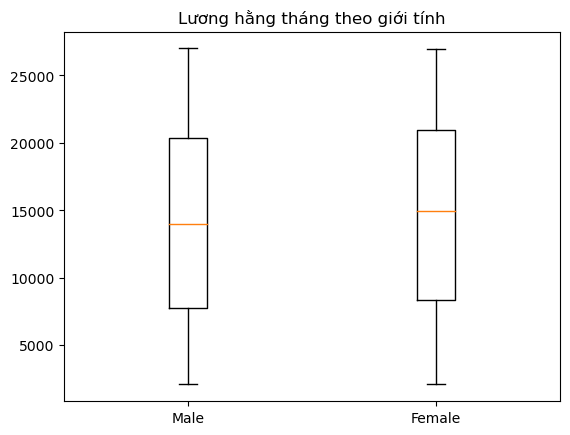

In [32]:
plt.title("Lương hằng tháng theo giới tính")
plt.boxplot([male.values,female.values],labels=['Male','Female']) 
plt.show()

**Nhận xét:**
- Phân bố mức lương theo tháng giữa nam và nữ tương đối giống nhau. Điều này chứng tỏ nam nữ đều bình đẳng như nhau, không có sự phân biệt đối với mức lương hàng tháng đối với nam và nữ

## Scatter 

Biểu đồ scatter thường được dùng để đánh giá sự tương quan giữa 2 biến trong tập dữ liệu. Biểu đồ thể hiện các giá trị trên không gian 2 chiều, trục x thể hiện gái trị của biến số thứ nhất, trục y thể hiện giá trị của biến số thứ 2. 

### Thu nhập hằng tháng và số năm kinh nghiệm có sự liên quan với nhau như thế nào?

**Trường dữ liệu TotalWorkingYears, MonthlyIncome**
- Ý nghĩa: Đánh giá sự tương quan giữa thu nhập và số năm kinh nghiệm
- Lý do chọn biểu đồ: Sự phân tán của các điểm trên biểu đồ scatter có thể cho thấy mức độ tương quan giữa hai biến số.


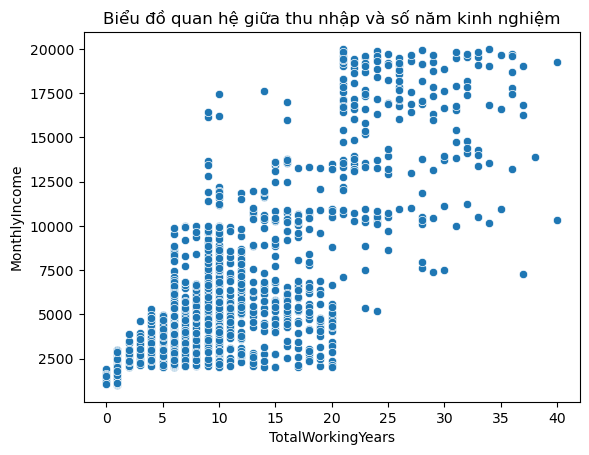

In [33]:
sns.scatterplot(data = data, x = "TotalWorkingYears", y = "MonthlyIncome")
plt.title("Biểu đồ quan hệ giữa thu nhập và số năm kinh nghiệm")
plt.show()

**Nhận xét**
- Nhìn chung thu nhập có xu hướng tăng theo số năm kinh nghiệm. Các chấm tròn ở phía sau thường ở vị trí cao hơn. 
- Tiền lương có sự chênh lệch giữa mức trước 20 năm và sau 20 năm. Điều này có thể là do sau khi làm việc lâu thì người ta sẽ lên chức cao và công việc khó hơn dẫn đến mức lương có sự khác biệt rất lớn.
- Đa số các chấm tròn tập trung ở vùng từ 0-20, có thể nói là đa số nhân viên đều dưới 20 năm kinh nghiệm, càng lên cao càng ít người.
- Ở mức số năm kinh nghiệm cao (từ 20 năm trở lên) có mức lương rất chênh lệch với nhau, điều này có thể là do đặc thù của ngành.

## Line

Việc vẽ biểu đồ scatter có thể biểu diễn tốt mối tương quan giữa 2 biến, tuy nhiên đối với biểu đồ trên thì cùng 1 giá trị x, có rất nhiều giá trị y. Trong trường hợp người ta muốn biết câu trả lời cho câu hỏi "Với số năm kinh nghiệm này thì mức lương thông thường khoảng bao nhiêu?" thì sẽ rất khó để nhìn thấy. Mặc dù ai cũng biết rằng mức lương không chỉ phụ thuộc vào số năm kinh nghiệm nên việc đưa ra một con số là không chính xác, tuy nhiên mọi người vẫn muốn một con số tương đối, thông thường là sẽ lấy giá trị trung bình. Để trực quan cho câu hỏi trên, ta sẽ dùng biểu đồ đường.

### Thu nhập hằng tháng và số năm kinh nghiệm có sự liên quan với nhau như thế nào?

**Trường dữ liệu TotalWorkingYears, MonthlyIncome và JobRole**
- Ý nghĩa: Đánh giá sự tương quan giữa thu nhập và số năm kinh nghiệm
- Lý do chọn biểu đồ: Để trả lời câu hỏi "Với số năm kinh nghiệm này thì mức lương thông thường khoảng bao nhiêu?"
    thì việc sử dụng biểu đồ scatter sẽ khó nhìn nhận vì cùng một giá trị năm kinh nghiệm có nhiều giá
    trị thu nhập khác nhau. Biểu đồ line sẽ phù hợp hơn trong trường hợp này

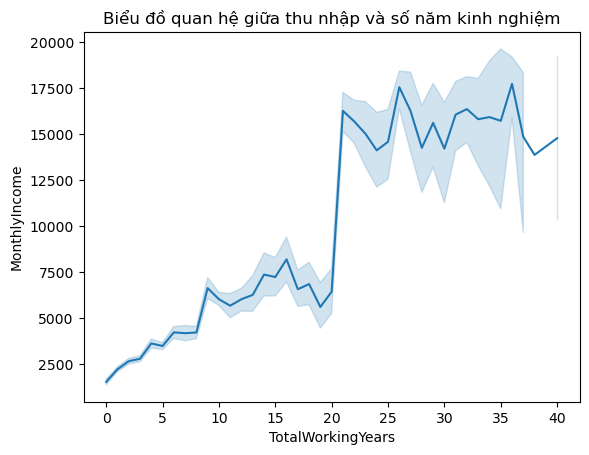

In [34]:
sns.lineplot(data = data, x = "TotalWorkingYears", y = "MonthlyIncome", estimator=np.mean)
plt.title("Biểu đồ quan hệ giữa thu nhập và số năm kinh nghiệm")
plt.show()

Nhận xét:
- Biểu đồ đường trên lấy giá trị trung bình của y với mỗi giá trị x bằng nhau. Phần nhạt to ra là độ lỗi, được tính bằng độ lệch chuẩn. Phần nhạt màu phình ra càng to chứng tỏ các mức lương của những người có cùng số năm kinh nghiệm đó có sự chênh lệch rất lớn hay có thể nói là mức lương còn phụ thuộc rất nhiều vào những yếu tố khác nữa chứ không chỉ là năm kinh nghiệm. Trường hợp khác có thể là cùng giá trị x đó có quá ít giá trị y nên độ lệch sẽ lớn.
- Mức lương trước 20 năm kinh nghiệm có xu hướng tăng dần. Độ chênh lệch giữa các nhân viên khác nhau cũng không cao.
- Sau 20 năm thì thu nhập sẽ đột biến, mức lương sau 20 năm kinh nghiệm cũng chênh lệch rất lớn giữa những người khác nhau.

Tuy vậy, mỗi vai trò khác nhau cũng sẽ có thu nhập khác nhau. Vì thế, dưới đây ta sẽ vẽ mỗi biểu đồ cho mỗi vai trò để nhìn nhận rõ hơn về mối quan hệ giữa thu nhập và số năm kinh nghiệm.

In [35]:
roles = data.groupby('JobRole').size()
roles

JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
dtype: int64

In [36]:
def data_df_job(data, job):
    return data[data['JobRole'] == job]

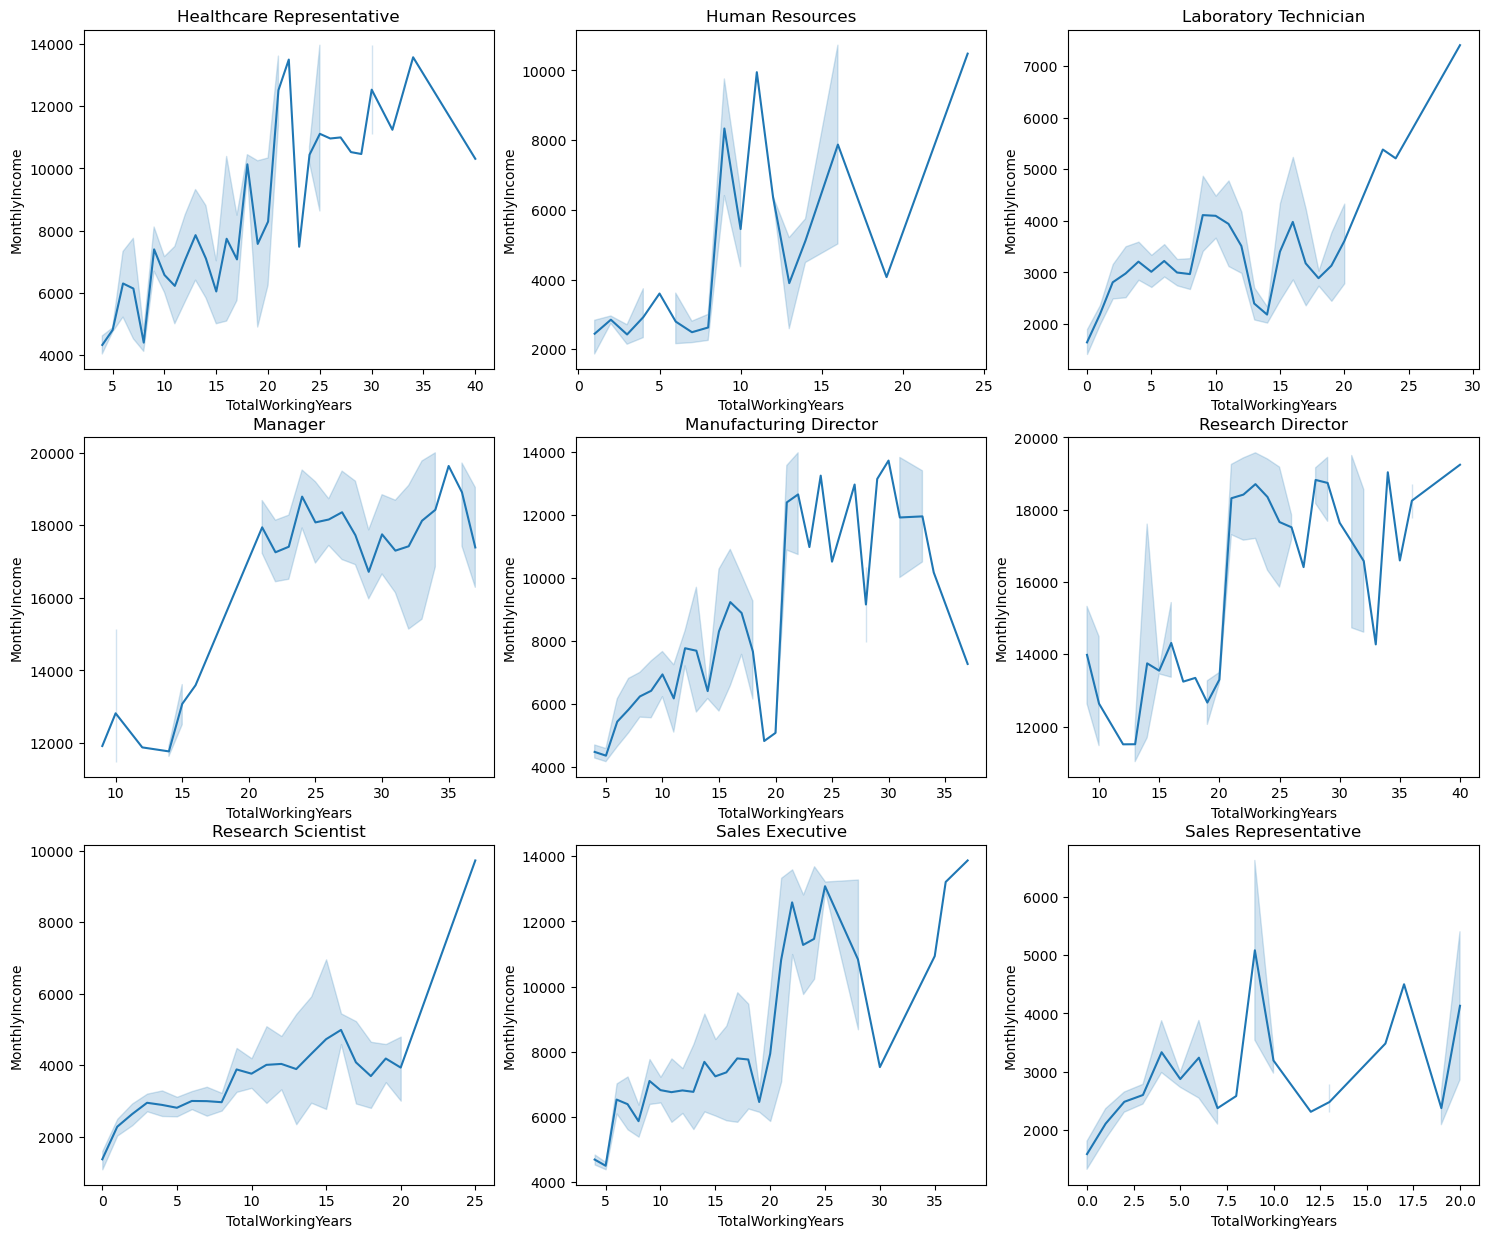

In [37]:
fig, axs = plt.subplots(3, 3, figsize=(18, 5*3))
axs = axs.flatten()
for i, role in enumerate(roles.index):
    role_df = data_df_job(data, role)
    sns.lineplot(data = role_df, x = "TotalWorkingYears", y = "MonthlyIncome", estimator=np.mean, 
                 ax = axs[i])
    axs[i].set_title(role)
plt.show()


**Nhận xét:**
- Theo các biểu đồ trên, mỗi ngành đều có mức lương khác nhau. Trong đó "Manager" và "Research Director" là cao nhất, mức lương tối thiểu của 2 mảng này đủ cao hơn mức lương tối đa của một số mảng khác.
- Đối với các cấp bậc của quản lý như, "Manager", "Manufacturing Director", "Research Director" thì mức lương rất cao, số năm kinh nghiệm tối thiểu cũng rất cao. Bên cạnh đó có một số vai trò có số năm kinh nghiệm tối đa thấp hơn các vai trò khác như "Human Resources", "Sales Representative". Ta có thể hiểu rằng những người làm việc trong những mảng này đa số là những người trẻ tuổi, sau một thời gian thì họ sẽ chuyển sang công việc khác hoặc lên nắm giữ vai trò cao hơn.

### Thu nhập hàng tháng của nhân viên ảnh hưởng thế nào bới trình độ học vấn?

**Trường dữ liệu MonthlyIncome, Education**
* Ý nghĩa biểu đồ: Thu nhập trung bình của nhân viên theo trình độ học vấn
* Lý do chọn biểu đồ: Biểu đồ đường thể hiện được sự phát triển của thu nhập nhân viên theo trình độ học vấn của họ

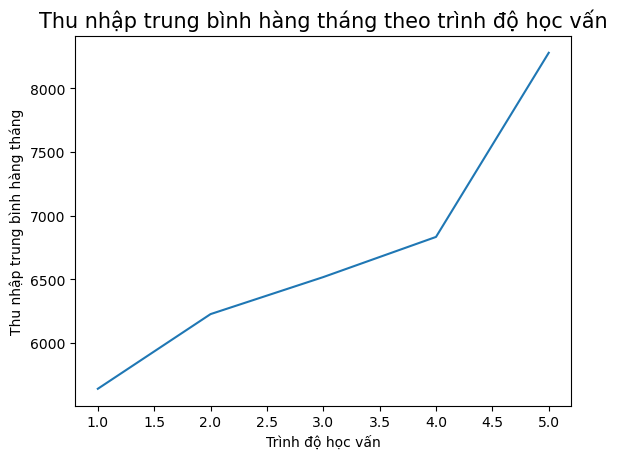

In [38]:
edu_income = data.groupby('Education')['MonthlyIncome'].mean().reset_index()

plt.plot(edu_income['Education'], edu_income['MonthlyIncome'])
plt.xlabel('Trình độ học vấn', fontsize=10)
plt.ylabel('Thu nhập trung bình hàng tháng', fontsize=10)
plt.title('Thu nhập trung bình hàng tháng theo trình độ học vấn', fontsize=15)
plt.show()

**Nhận xét:**
  * Các nhân viên có trình độ học vấn cao hơn sẽ nhận được thu nhập cao hơn.
  * Thu nhập của nhân viên cao hơn rõ rệt khi trình độ học vấn của họ ở mức 4-5

### So sánh giữa thu nhập giữa nhân viên có khả năng nghỉ việc và không theo cấp độ công việc

**Trường dữ liệu JobLevel, MonthlyIncome, Attrition**
* Ý nghĩa biểu đồ: So sánh thu nhập giữa nhân viên có khả năng nghỉ việc và không theo cấp độ công việc.
* Lý do chọn biểu đồ: Biểu đồ đường cho thấy được sự phát triển của thu nhập hàng tháng khác nhau theo cấp độ công việc giữa nhân viên có khả năng nghỉ việc và không.

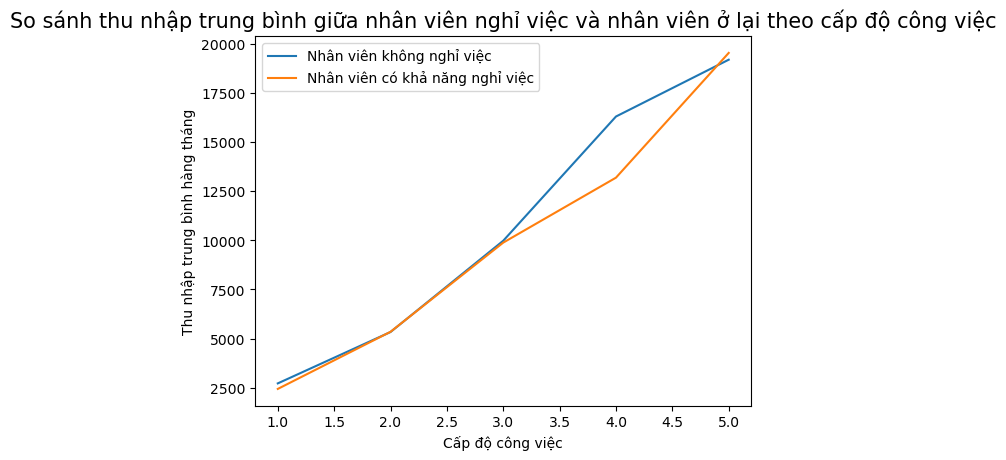

In [39]:
stay_emp = data[data['Attrition'] == 'No']
att_emp = data[data['Attrition'] == 'Yes']

stay_med = stay_emp.groupby("JobLevel")[['MonthlyIncome']].median().reset_index()
att_med = att_emp.groupby("JobLevel")[['MonthlyIncome']].median().reset_index()

plt.plot(stay_med['JobLevel'], stay_med['MonthlyIncome'], label ='Nhân viên không nghỉ việc')
plt.plot(att_med['JobLevel'], att_med['MonthlyIncome'], label ='Nhân viên có khả năng nghỉ việc')

plt.title('So sánh thu nhập trung bình giữa nhân viên nghỉ việc và nhân viên ở lại theo cấp độ công việc', fontsize=15)
plt.xlabel("Cấp độ công việc", fontsize=10)
plt.ylabel("Thu nhập trung bình hàng tháng", fontsize=10)
plt.legend()
plt.show()

**Nhận xét:**
  * Ở cấp độ công việc 1-3: nhân viên có khả năng nghỉ việc và không có thu nhập hàng tháng tương đương với nhau. Do ở những người mới, cấp độ công việc thấp thì việc gắn bó với công ty ít ảnh hưởng đến mức lương của họ hơn. 
  * Ở cấp độ công việc 3-5: nhân viên không nghỉ việc có thu nhập cao hơn khá nhiều so với nhân viên có khả năng nghỉ việc. Do ở những người ở cấp độ cao này có kinh nghiệm, kỹ năng cao trong công việc của mình họ thường sẽ ở các vị trí quan trọng trong công ty nên các công ty sẽ đưa ra mức thu nhập cao hơn nếu như họ gắn bó, việc này giúp họ giữ chân các nhân viên ở vị trí quan trọng của mình.
  * Ở các nhân viên cấp độ cao hơn 3+ thì việc gắn bó với công ty sẽ giúp họ có thu nhập cao hơn.

## Hexbin plot

### Trường dữ liệu YearsAtCompany, MonthlyRate

- Ý nghĩa biểu đồ: Sự phân bố và mối quan hệ giữa số năm làm việc cho công ty và mức lương mỗi tháng
- Lý do chọn biểu đồ: Biểu đồ cùng lúc cho thấy sự phân bố về số năm làm việc, sự phân bố về mức lương hàng tháng và (mật độ) số lượng nhân viên đạt được mức lương nhất định ứng với độ thâm niên nhất định trong công ty. Nếu chỉ sử dụng histogram thì sẽ cần phải vẽ 2 histogram để thấy sự phân bố, và cũng không quan sát được liệu nó có mối liên quan gì không. Ta có thể tích hợp chúng bằng biểu đồ "hexbin plot".

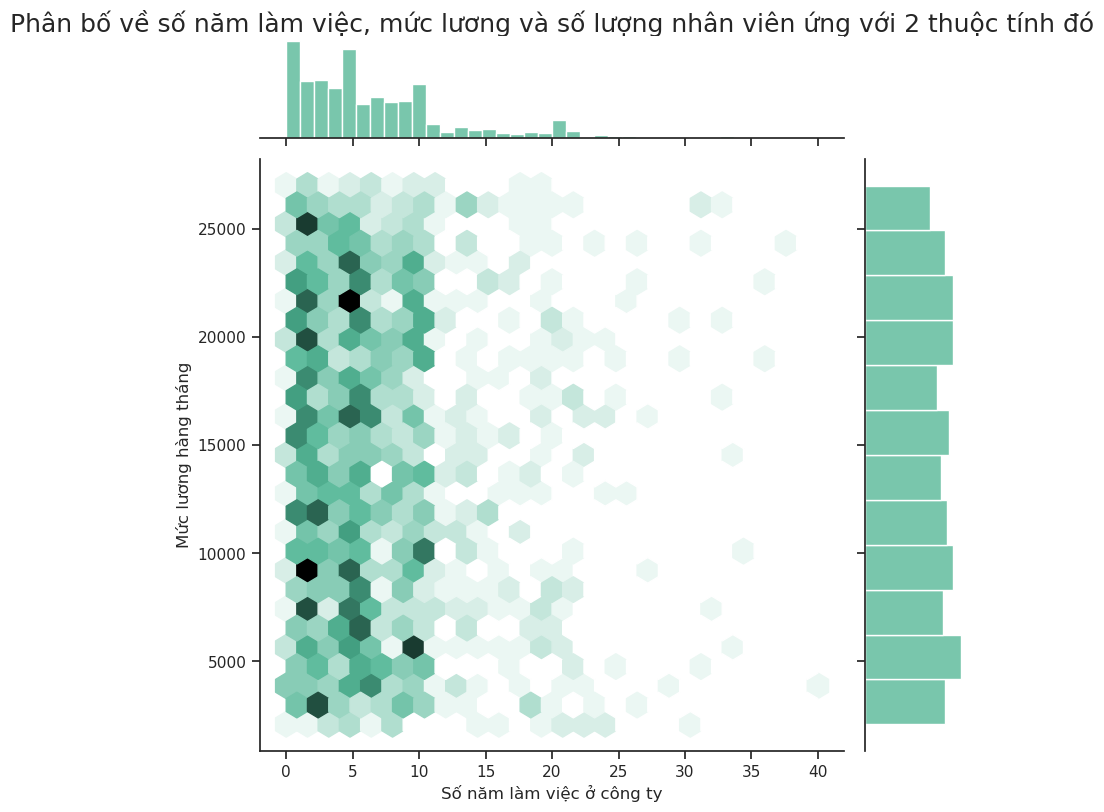

In [40]:
sns.set_theme(style="ticks")
sns.jointplot(x=data["YearsAtCompany"], y=data["MonthlyRate"], kind="hex", color="#4CB391", height=8)
plt.title("Phân bố về số năm làm việc, mức lương và số lượng nhân viên ứng với 2 thuộc tính đó", fontsize = 18, y = 1.2)
plt.xlabel("Số năm làm việc ở công ty")
plt.ylabel("Mức lương hàng tháng");

**Nhận xét:**
   - Đa số các nhân viên làm việc cho công ty được dưới 10 năm, trong khi đó các mức lương khác nhau phân bố khá đều giữa các nhân viên.
   - Số lượng nhân viên làm việc trong công ty dưới 10 năm lớn hơn hẳn so với số nhân viên làm việc hơn 10 năm, cho thấy phần đông nhân viên không gắn bó lâu với công ty (so với khoảng 0-40 năm).
   - Qua số lượng năm làm việc ở công ty thì sự phân bố về mức lương từ thấp đến cao đều ngang ngang nhau, ta có thể kết luận không phải làm lâu năm thì lương sẽ cao, không có sự phân biệt đối xử giữa những người làm lâu hay mới làm (mà có thể sẽ dựa trên năng lực và khả năng đóng góp).

## Histogram

### Trường dữ liệu Age, Attrition

- Ý nghĩa biểu đồ: Phân bố tuổi của nhân viên trong công ty và khả năng đã rời công ty
- Lý do chọn biểu đồ: Biểu đồ này thể hiện rõ sự phân bố về tuổi trong công ty cũng như khả năng đã rời công ty giữa các nhóm tuổi.

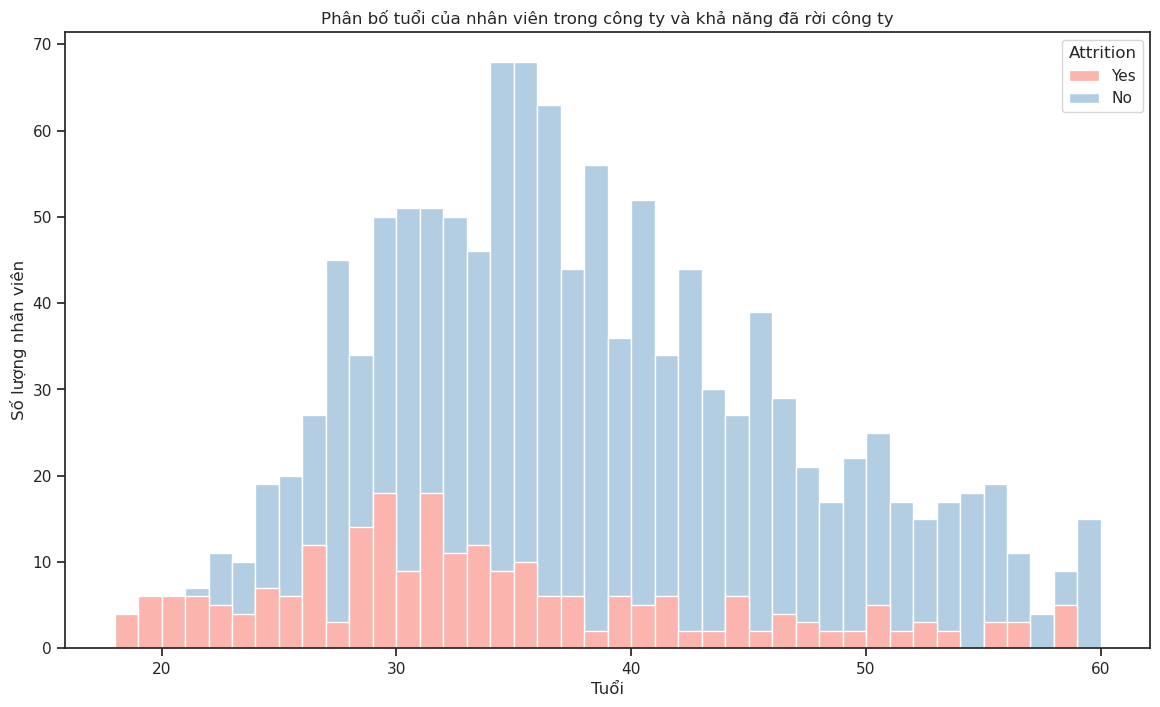

In [41]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.histplot(data=data, x= "Age", binwidth = 1, hue= "Attrition", alpha=1, palette=sns.color_palette("Pastel1", 2))
plt.title("Phân bố tuổi của nhân viên trong công ty và khả năng đã rời công ty")
plt.xlabel("Tuổi")
plt.ylabel("Số lượng nhân viên");

**Nhận xét:**
   - Đa số nhân viên thuộc khoảng tuổi từ 25-45 tuổi, số lượng nhân viên dưới 25 tuổi khá ít có thể là do công ty tập trung vào nguồn nhân lực có kinh nghiệm thay vì nhân lực trẻ, mới vào nghề.
   - Số lượng nhân viên thuộc khoảng tuổi 40-60 lớn hơn nhiều so với số nhân viên có tuổi từ 20-30. Điều này có thể là vì lượng nhân viên trẻ tuổi đa phần là tuyển mới, trong khi những nhân viên còn lại một phần là tuyển mới, một phần là nhân viên trẻ già đi (tỉ lệ nghỉ việc cũng không quá cao).
   - Nhìn chung, đa phần nhân viên từ 20-30 tuổi có xu hướng nghỉ việc cao (phần lớn nhân viên từ 20-25 tuổi) có thể do độ tuổi này còn trẻ nên muốn nhảy việc nhiều hơn (lí do nhảy việc có thể để chuyển sang môi trường tốt hơn, lương cao hơn, được học hỏi nhiều hơn), trong khi độ tuổi từ 30 trở đi có xu hướng gắn bó lâu dài hơn với công ty. 

### Trường dữ liệu YearsAtCompany, JobLevel 

- Ý nghĩa biểu đồ: Phân bố số năm làm việc của nhân viên tại công ty với cấp độ công việc
- Lý do chọn biểu đồ: Biểu đồ này vừa thể hiện được sự phân bố về số năm làm việc, vừa cho thấy sự phân bố về cấp độ trong công việc giữa các nhân viên cùng tuổi và các độ tuổi với nhau

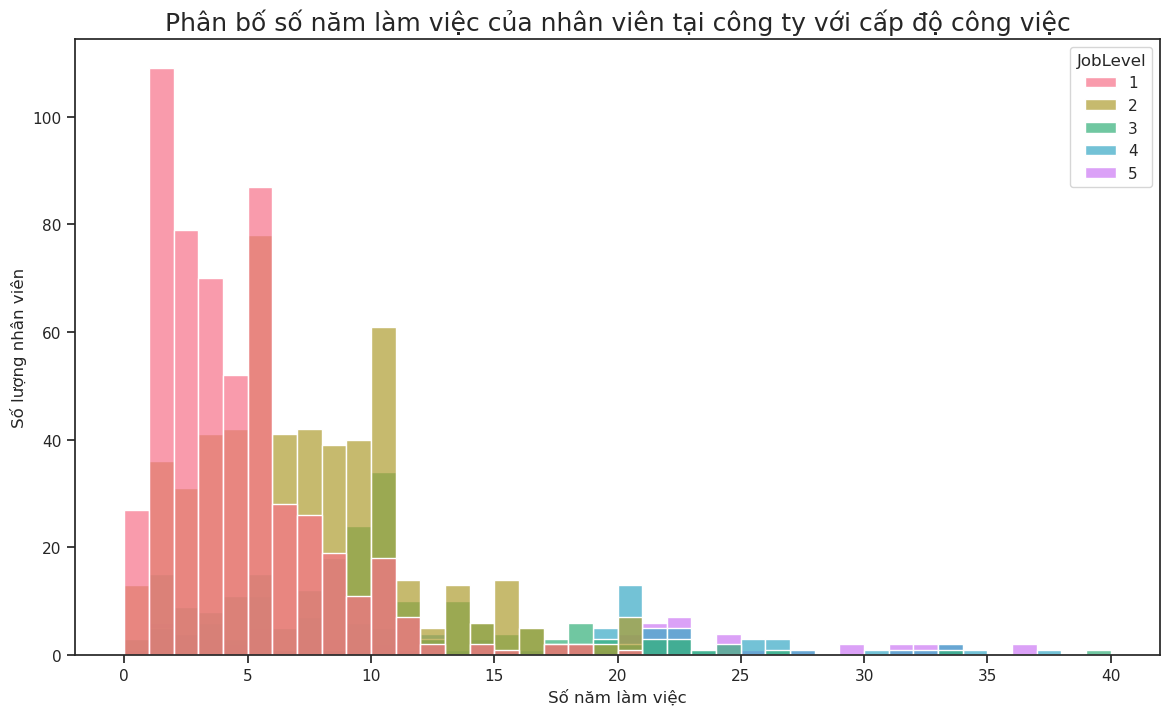

In [42]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.histplot(data=data, x= "YearsAtCompany", binwidth = 1, alpha=0.7, hue="JobLevel",  palette= sns.color_palette("husl", 5))
plt.title("Phân bố số năm làm việc của nhân viên tại công ty với cấp độ công việc", fontsize = 18)
plt.xlabel("Số năm làm việc")
plt.ylabel("Số lượng nhân viên");

**Nhận xét:**
  - Biểu đồ thể hiện phần lớn nhân viên làm việc tại công ty từ 0-10 năm, và những nhân viên này đa số làm các công việc cấp độ 1 và 2, chỉ số ít trong đó đạt đến cấp độ 3 hoặc cao hơn.
  - Những nhân viên lâu năm (hơn 10 năm) thường đạt cấp độ công việc cao hơn có thể là do quá trình làm việc dài nên được thăng tiến và giữ các vai trò quan trọng trong công ty nên có cấp độ công việc cao, tuy nhiên cũng có một số lượng nhỏ nhân viên tuy gắn bó với công ty đã lâu (15-20 năm) nhưng cấp độ lại không thăng tiến (vẫn ở cấp 1, 2) có thể do thiếu các kĩ năng phù hợp, mối quan hệ không tốt hoặc khả năng hoàn thành tốt công việc không cao.